In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker
import IPython.display

# 사다리꼴 공식
사다리꼴들을 사용해 곡선 아래의 면적을 추정하는 방식이다.

$\int^b_a{f(x)dx}$를 추정하기 위해 구간 $[a,b]$를 분할 $P$에 따라 부분구간들로 나눈다.

$$P=\{a=x_0<x_1<x_2<\dots<x_n=b\}$$

이를 통해 적분의 추정값을 얻을 수 있다. 이 추정값을 $T(f;P)$로 표시한다.

그러면 이때 부분구간 $[x_i, x_{i+1}]$을 사다리꼴의 높이로 하고 밑변이 수직인 두변 f(x_i)와 f(x_{i+1})인 사다리꼴을 나타낼 수 있으므로 부분구간 $[x_i, x_{i+1}]$에서 **기본 사다리꼴 공식**을 얻을 수 있다.

$$\int^{x_{i+1}}_{x_i}f(x)dx \approx \frac{1}{2}(x_{i+1}-x_i)(f(x_i)+f(x_{i+1}))$$

이를 통해 다음과 같이 모든 사다리꼴의 총 면적을 구할 수 있는데 이를 **복합 사다리꼴 공식**이라고 부른다.

$$\int^{b}_{a}f(x)dx \approx \frac{1}{2}\sum^{n-1}_{i=0}(x_{i+1}-x_i)(f(x_i)+f(x_{i+1}))$$

## 등간격 복합 사다리꼴 공식
등간격은 분할점 $x_i$가 일정한 간격으로 떨어져 있다는 뜻이다. 이는 $h=\frac{b-a}{n},\,0\leq i\leq n$일 때, $x_i=a+ih$로 나타낼 수 있게 된다. 이 경우에는 $T(f;P)$를 더 간단하게 나타낼 수 있다.
$$T(f;P)=\frac{1}{2}\sum^{n-1}_{i=0}{(f(x_i)+f(x_{i+1}))}$$

계산량을 줄이기 위해 선호되는 바람직한 복합 사다리꼴 공식은 다음과 같다.

$$\int^{b}_{a}f(x)dx \approx T(f;P)=\frac{1}{2}(f(x_0)+f(x_n)) + h\sum^{n-1}_{i=1}f(x_i)$$

In [3]:
# some codes fort trapezoid
def tripezoid_uniform(f, a, b, n):
    h = (b-a)/n
    d = np.linspace(a, b, n)
    return (f(a)+f(b))/2 + h*np.sum([f(i) for i in d])

<IPython.core.display.Math object>

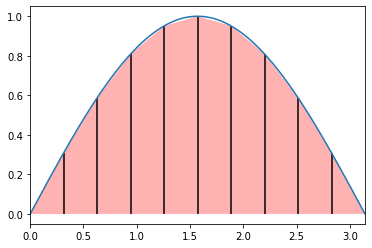

In [4]:
fig, ax = plt.subplots()

_a = 0
_b = np.pi
_n = 11
_dx = (_b-_a)/_n

_func = np.sin 
_domain = np.linspace(_a, _b, _n)
_appdomain = np.linspace(_a, _b, 10000)

ax.set_xlim((_a, _b))

IPython.display.display(IPython.display.Math(r"\int^{\pi}_{0}{\sin (x) dx} = 2 \approx"+str(tripezoid_uniform(_func, _a, _b, _n)) ))

ax.plot(_appdomain, [_func(i) for i in _appdomain])

for i in range(_n-1):
    ax.fill([_domain[i], _domain[i+1], _domain[i+1], _domain[i]], [0, 0, _func(_domain[i+1]), _func(_domain[i])], "r", alpha=0.3)
    ax.vlines(_domain[i+1], _func(_domain[i+1]), 0)
plt.show()

# 재귀 사다리꼴 공식

구간 $[a,b]$를 균등 분할한 $2^n$개의 부분구간으로 나눴을 때 복합 사다리꼴 공식은 다음과 같아진다.

$$R(n, 0) = h\sum^{2^n-1}_{i=1}{f(a+ih)}+\frac{h}{2}(f(a)+f(b))$$

롬베르크 알고리즘에서 $f$에 대한 불필요한 계산 없이 $R(n-1,0)$으로부터 $R(n,0)$을 계산할 수 있는 수단이 필요하다. 그런 재귀 사다리꼴 공식은 다음과 같다.

$$R(n,0)=\frac{1}{2}R(n-1, 0)+\sum^{2^n-1}_{k=1}f(a+(2k-1)h)\quad (n\geq 1)$$

이때 $h=(b-a)/2^n$, $R(0, 0)=\frac{1}{2}(b-a)(f(a)+f(b))$


# 롬베르크 알고리즘

롬베르크 알고리즘은 수의 삼각배열을 생성한다. 이 배열은 모두 $\int^{b}_{a}f(x)dx$의 근사값이다.

$$\begin{matrix}
R(0, 0) \\
R(1, 0) & R(1, 1) \\
R(2, 0) & R(2, 1) & R(2, 2) \\
R(3, 0) & R(3, 1) & R(3, 2) & R(3, 3) \\
\vdots & \vdots & \vdots & \vdots & \ddots \\
R(n, 0) & R(n, 1) & R(n, 2) & R(n, 3) & \cdots & R(n, n)
\end{matrix}$$

이 배열의 첫번째인 $R(0,0)$은 하나의 사다리꼴로 얻어진 값이다.

$$R(0, 0)=\frac{1}{2}(b-a)(f(a)+f(b))$$

$$R(n,0)=\frac{1}{2}R(n-1, 0)+\sum^{2^n-1}_{k=1}f(a+(2k-1)h)\quad (h=(b-a)/2^n,\,n\geq 1)$$

롬베르크 배열의 둘째 열부터는 다음 보외법 공식에 의해 생성된다.

$$R(n,m)=R(n,m-1)+\frac{1}{4^m-1}(R(n,m-1)-R(n-1,m-1))$$

# 오일러-매클로린 공식

# 기본 심프슨 공식

## 등간격 기본 심프슨 공식


## 복합 심프슨 공식

## 적응적 심프슨 기법

# 가우스 구적법

## 르장드르 다항식